<a href="https://colab.research.google.com/github/ElhassanGitUub/PyProj/blob/main/Box_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-02-05 17:27:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  64.3MB/s    in 3.1s    

2025-02-05 17:27:28 (64.3 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


In [4]:
QUERY = "SELECT name as Table_Name FROM sqlite_master WHERE type = 'table'"
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


In [ ]:
QUERY = "SELECT * FROM main "
df_age = pd.read_sql_query(QUERY, conn)
print(df_age.TechEndorse)


### Task 1: Visualizing the Distribution of Data
**1. Box Plot of `CompTotal` (Total Compensation)**

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Télécharger la base de données SQLite
!wget -O survey-results-public.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

# Connexion à la base SQLite
conn = sqlite3.connect('survey-results-public.sqlite')

# Vérifier le nombre d'entrées dans la table
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print("Nombre total de lignes dans la base :", df.iloc[0, 0])

# Lire toutes les données
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

# Vérifier la présence de la colonne 'CompTotal'
if 'CompTotal' in df.columns:
    # Supprimer les valeurs nulles
    df = df[['CompTotal']].dropna()

    # Filtrer les outliers (99e percentile)
    upper_limit = df['CompTotal'].quantile(0.99)
    df_filtered = df[df['CompTotal'] <= upper_limit]

    # Tracer le box plot
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_filtered['CompTotal'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

    # Ajouter les labels et le titre
    plt.ylabel('Total Compensation')
    plt.title('Box Plot of Total Compensation')

    # Afficher le graphique
    plt.show()
else:
    print("La colonne 'CompTotal' n'existe pas dans la base de données.")

# Fermer la connexion
conn.close()




**2. Box Plot of Age (converted to numeric values)**

Convert the Age column into numerical values and visualize the distribution.



In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Lire la table complète pour vérifier les données disponibles
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

# Vérifier si la colonne 'Age' existe
if 'Age' in df.columns:
    # Convertir la colonne Age en valeurs numériques (ignorer les erreurs)
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

    # Supprimer les valeurs NaN après conversion
    df_age_clean = df[['Age']].dropna()

    # Tracer le box plot de Age
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_age_clean['Age'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

    # Ajouter les labels et le titre
    plt.ylabel('Age')
    plt.title('Box Plot of Age Distribution')

    # Afficher le graphique
    plt.show()
else:
    print("La colonne 'Age' n'existe pas dans la base de données.")

# Fermer la connexion
conn.close()


### Task 3: Visualizing the Composition of Data
1. Box Plot of ConvertedCompYearly for the Top 5 Developer Types:

Analyze compensation across the top 5 developer roles.


2. Box Plot of CompTotal for the Top 5 Countries:

Analyze compensation across respondents from the top 5 countries.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Charger toutes les données
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

### 1. Box Plot de ConvertedCompYearly pour les 5 principaux types de développeurs ###
if 'ConvertedCompYearly' in df.columns and 'DevType' in df.columns:
    # Supprimer les valeurs nulles
    df_filtered = df[['ConvertedCompYearly', 'DevType']].dropna()

    # Séparer les types de développeurs multiples et compter les occurrences
    df_filtered['DevType'] = df_filtered['DevType'].str.split(';')
    dev_exploded = df_filtered.explode('DevType')

    # Trouver les 5 rôles les plus fréquents
    top_5_roles = dev_exploded['DevType'].value_counts().head(5).index

    # Filtrer les données pour ces rôles
    df_top_roles = dev_exploded[dev_exploded['DevType'].isin(top_5_roles)]

    # Tracer le box plot
    plt.figure(figsize=(10, 6))
    df_top_roles.boxplot(column='ConvertedCompYearly', by='DevType', vert=True, patch_artist=True)

    plt.title('Box Plot of ConvertedCompYearly for Top 5 Developer Roles')
    plt.xlabel('Developer Type')
    plt.ylabel('Yearly Compensation')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.suptitle("")
    plt.show()
else:
    print("Les colonnes nécessaires ('ConvertedCompYearly' ou 'DevType') ne sont pas présentes dans la base.")

### 2. Box Plot de CompTotal pour les 5 pays les plus représentés ###
if 'CompTotal' in df.columns and 'Country' in df.columns:
    # Supprimer les valeurs nulles
    df_filtered = df[['CompTotal', 'Country']].dropna()

    # Trouver les 5 pays avec le plus de répondants
    top_5_countries = df_filtered['Country'].value_counts().head(5).index

    # Filtrer les données pour ces pays
    df_top_countries = df_filtered[df_filtered['Country'].isin(top_5_countries)]

    # Tracer le box plot
    plt.figure(figsize=(10, 6))
    df_top_countries.boxplot(column='CompTotal', by='Country', vert=True, patch_artist=True)

    plt.title('Box Plot of CompTotal for Top 5 Countries')
    plt.xlabel('Country')
    plt.ylabel('Total Compensation')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.suptitle("")
    plt.show()
else:
    print("Les colonnes nécessaires ('CompTotal' ou 'Country') ne sont pas présentes dans la base.")

# Fermer la connexion
conn.close()


### Task 4: Visualizing Comparison of Data
1. Box Plot of CompTotal Across Employment Types:

Analyze compensation for different employment types.


2. Box Plot of YearsCodePro by Job Satisfaction (JobSatPoints_6):



--2025-02-05 18:14:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.5’

survey-results-publ 100%[===================>] 201.62M  11.1MB/s    in 17s     

2025-02-05 18:15:15 (11.8 MB/s) - ‘survey-results-public.sqlite.5’ saved [211415040/211415040]



<Figure size 1000x600 with 0 Axes>

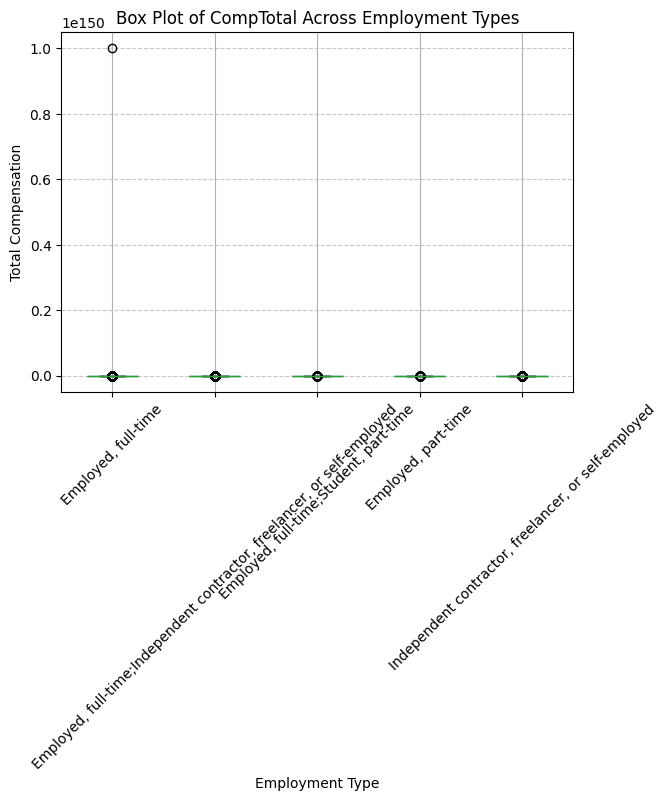

<Figure size 1000x600 with 0 Axes>

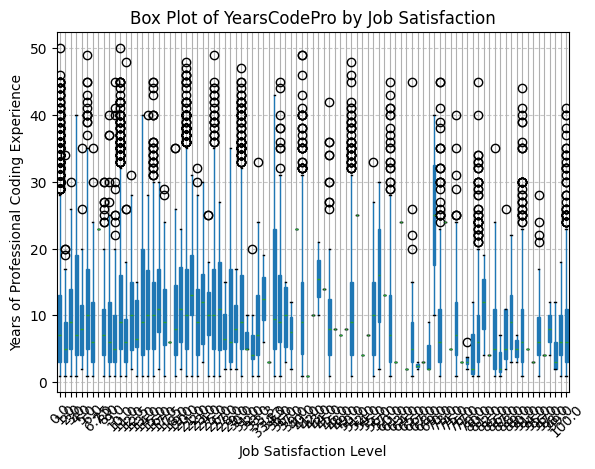

In [15]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

# Charger les données
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

### 1. Box Plot de CompTotal par type d'emploi ###
if 'CompTotal' in df.columns and 'Employment' in df.columns:
    df_filtered = df[['CompTotal', 'Employment']].dropna()

    # Garder uniquement les 5 types d'emploi les plus fréquents
    top_5_employment = df_filtered['Employment'].value_counts().head(5).index
    df_filtered = df_filtered[df_filtered['Employment'].isin(top_5_employment)]

    # Tracer le box plot
    plt.figure(figsize=(10, 6))
    df_filtered.boxplot(column='CompTotal', by='Employment', vert=True, patch_artist=True)

    plt.title('Box Plot of CompTotal Across Employment Types')
    plt.xlabel('Employment Type')
    plt.ylabel('Total Compensation')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.suptitle("")
    plt.show()
else:
    print("Les colonnes nécessaires ('CompTotal' ou 'Employment') sont absentes.")

### 2. Box Plot de YearsCodePro par JobSatPoints_6 ###
if 'YearsCodePro' in df.columns and 'JobSatPoints_6' in df.columns:
    df_filtered = df[['YearsCodePro', 'JobSatPoints_6']].dropna()

    # Convertir YearsCodePro en valeurs numériques
    df_filtered['YearsCodePro'] = pd.to_numeric(df_filtered['YearsCodePro'], errors='coerce').dropna()

    # Tracer le box plot
    plt.figure(figsize=(10, 6))
    df_filtered.boxplot(column='YearsCodePro', by='JobSatPoints_6', vert=True, patch_artist=True)

    plt.title('Box Plot of YearsCodePro by Job Satisfaction')
    plt.xlabel('Job Satisfaction Level')
    plt.ylabel('Years of Professional Coding Experience')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.suptitle("")
    plt.show()
else:
    print("Les colonnes nécessaires ('YearsCodePro' ou 'JobSatPoints_6') sont absentes.")

# Fermer la connexion
conn.close()
